In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# turning off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
dates = pd.read_csv("data/Dates.csv")
products = pd.read_csv("data/Metadata.csv")
transactions = pd.read_csv("data/Transactions.csv")

### Product Data

- SELL_ID: Unique ID of the basket/cart
- SELL_CATEGORY: 0 if the product is sold alone 2 if the product is sold with some other products
- ITEM_ID: Unique ID for the product
- ITEM_NAME: Name of the product

In [7]:
product.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [17]:
product.describe(include=["O"])

,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [5]:
# checking unique no of products
print(f"The total no of unique products is {products['ITEM_ID'].nunique()}")
print(f"The shape of products data is {products.shape}")

The total no of unique products is 4
The shape of products data is (11, 4)


In [37]:
# checking for null values
product.isna().sum()

SELL_ID          0
SELL_CATEGORY    0
ITEM_ID          0
ITEM_NAME        0
dtype: int64

### Transaction Data

- CALENDAR_DATE: Date of transaction
- PRICE: Price of the product
- QUANTITY: Quantity of the product
- SELL_ID: Unique ID of the basket/cart
- SELL_CATEGORY: 0 if the product is sold alone 2 if the product is sold with some other products

In [8]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [46]:
print(f"The shape of the data {transactions.shape}")
print(f"We have data from {transactions['CALENDAR_DATE'].min()} to {transactions['CALENDAR_DATE'].max()}")
print(f"The max price is {transactions['PRICE'].max()}")
print(f"The min price is {transactions['PRICE'].min()}")

The shape of the data (5404, 5)
We have data from 01/01/12 to 9/30/14
The max price is 16.5
The min price is 10.12


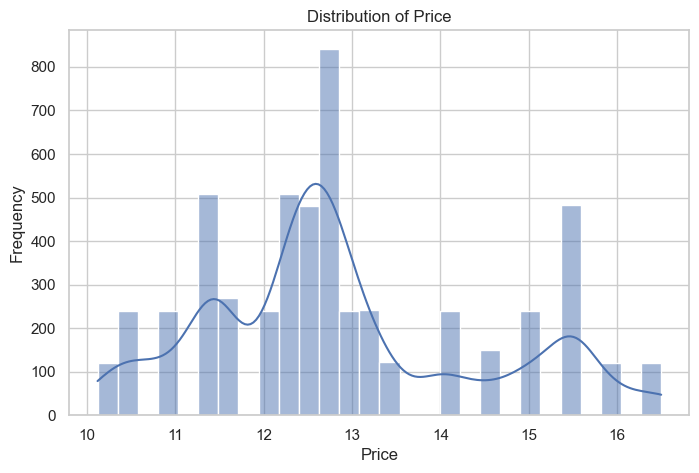

In [54]:
""" DISTRIBUTION OF PRICE"""

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure and a set of subplots
plt.figure(figsize=(8, 5))
# Plot the distribution of the numerical column
sns.histplot(transactions['PRICE'], kde=True)
# Add titles and labels
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Show the plot
plt.show()

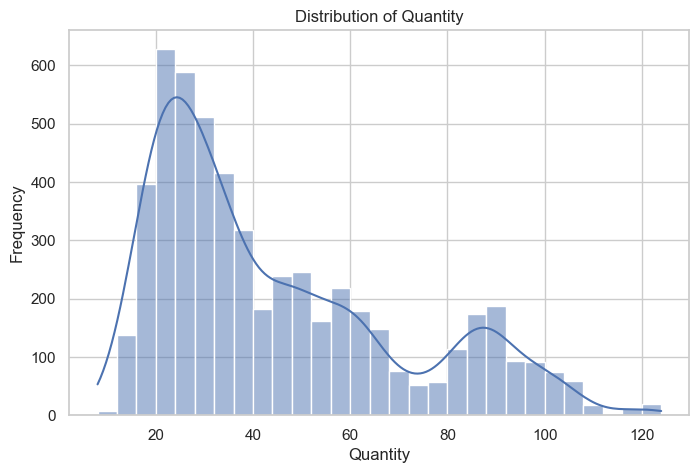

In [55]:
""" DISTRIBUTION OF QTY"""

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a figure and a set of subplots
plt.figure(figsize=(8, 5))
# Plot the distribution of the numerical column
sns.histplot(transactions['QUANTITY'], kde=True)
# Add titles and labels
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
# Show the plot
plt.show()

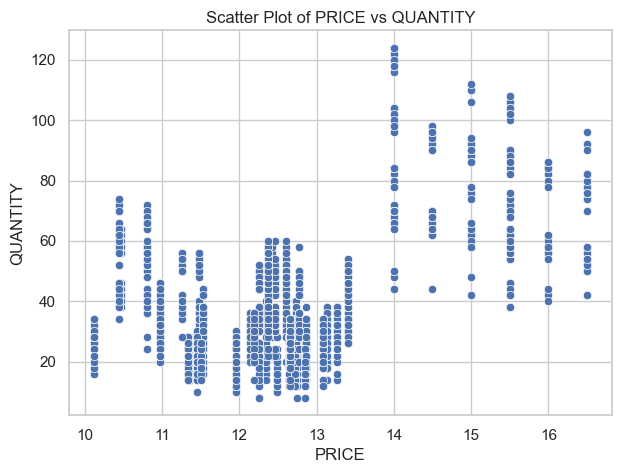

In [58]:
""" CORRELATION BETWEEN PRICE AND QTY"""

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Create a scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x='PRICE', y='QUANTITY', data=transactions)
# Add titles and labels
plt.title('Scatter Plot of PRICE vs QUANTITY')
plt.xlabel('PRICE')
plt.ylabel('QUANTITY')
# Show the plot
plt.show()



#### Dates Data

In [9]:
dates.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [60]:
# checking for any null values
dates.isna().sum()

CALENDAR_DATE             0
YEAR                      0
HOLIDAY                1244
IS_WEEKEND                0
IS_SCHOOLBREAK            0
AVERAGE_TEMPERATURE       0
IS_OUTDOOR                0
dtype: int64

In [67]:
# filling NaN with No holiday
dates['HOLIDAY'] = dates['HOLIDAY'].fillna("No Holiday")
print(f"The shape of the data is {dates.shape}")
print(f"The Holidays are {dates['HOLIDAY'].unique()}")
print(f"We have the data from {dates['CALENDAR_DATE'].min()} to {dates['CALENDAR_DATE'].max()} ")

The shape of the data is (1349, 7)
The Holidays are ['New Year' 'No Holiday' 'Luner New Year' 'Qing Ming Festival' 'Labor Day'
 'Dragon Boat Festivel' 'Mid-Autumn Day' 'National Day' 'WWII Celebration']
We have the data from 1/1/12 to 9/9/15 


#### Data Transformation

In [87]:
# Create dummy variables
dummies = pd.get_dummies(products['ITEM_NAME'],dtype=int)

# combining the dummies and sell id
sell_ids = pd.concat([products['SELL_ID'],dummies],axis=1)
sella_ids.head()

In [88]:
sell_ids

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [89]:
# in the above dataframe we have duplicates so lets group them
sell_ids = df_dummies.groupby(df_dummies['SELL_ID']).sum().reset_index()
sell_ids

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,2051,1,0,1,0
2,2052,1,0,0,1
3,2053,1,1,1,0
4,3028,0,0,0,1
5,3055,0,1,0,0
6,3067,0,0,1,0


In [100]:
# merging the product data with transactions data
df_merged = pd.merge(product.drop(columns=["ITEM_ID"]),transactions.drop(columns=["SELL_CATEGORY"]),on="SELL_ID")
df_merged

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.50,46
1,1070,0,BURGER,01/02/12,15.50,70
2,1070,0,BURGER,01/03/12,15.50,62
3,1070,0,BURGER,01/04/12,15.50,88
4,1070,0,BURGER,01/05/12,15.50,104
...,...,...,...,...,...,...
10803,2053,2,COFFEE,09/06/15,11.26,54
10804,2053,2,COFFEE,09/07/15,11.26,50
10805,2053,2,COFFEE,09/08/15,11.26,50
10806,2053,2,COFFEE,09/09/15,11.26,54


In [111]:
# eliminating duplicates by grouping the column
df_transaction = df_merged.groupby(["SELL_ID","SELL_CATEGORY","ITEM_NAME","CALENDAR_DATE","PRICE"])["QUANTITY"].sum().reset_index()
df_transaction

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.50,46
1,1070,0,BURGER,01/01/13,15.50,60
2,1070,0,BURGER,01/01/14,15.50,72
3,1070,0,BURGER,01/01/15,14.00,66
4,1070,0,BURGER,01/02/12,15.50,70
...,...,...,...,...,...,...
10787,2053,2,COKE,9/29/13,10.45,40
10788,2053,2,COKE,9/29/14,12.77,46
10789,2053,2,COKE,9/30/12,12.42,38
10790,2053,2,COKE,9/30/13,10.45,38


In [107]:
print(f"The shape of data before aggregating {df_merged.shape}")
print(f"The shape of data after aggregating {df_transaction.shape}")

The shape of data before aggregating (10808, 6)
The shape of data after aggregating (10792, 6)


In [121]:
# merging the df_transaction and dates dataframe
df = pd.merge(df_transaction,dates,on="CALENDAR_DATE")
df.to_csv("data.csv",index=False)

We know that on holiday,weekend and school breaks the price of the food items change, so we have to remove this effect to determine the typical price of the product on the usual day


In [119]:
# removing transactions made on Holidays, Week-ends, School breaks
df_filtered = df[(df['HOLIDAY'] == "No Holiday") & (df['IS_SCHOOLBREAK'] == 0) & (df['IS_WEEKEND'] == 0)]

### EDA